### Import Needed Packages

In [1]:
# 1
import matplotlib.pyplot as plt     # displaying images and plots
import numpy as np                  # numerical computations (especially SVD)
from matplotlib.image import imread # read image from a file

### Open image And Show

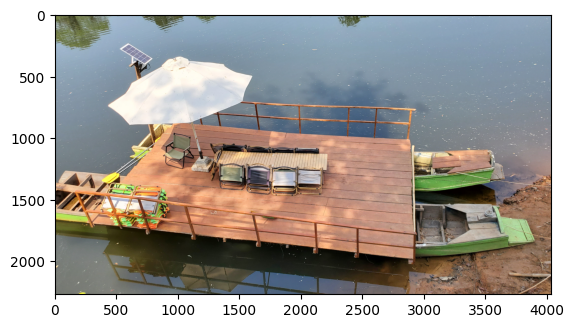

In [2]:
# 2
A = imread('/home/kanchnak/code/image-compression-with-SVD/images/boat.jpg')
imt = plt.imshow(A)


### Convert image to gray

Shape of X (2268, 4032)


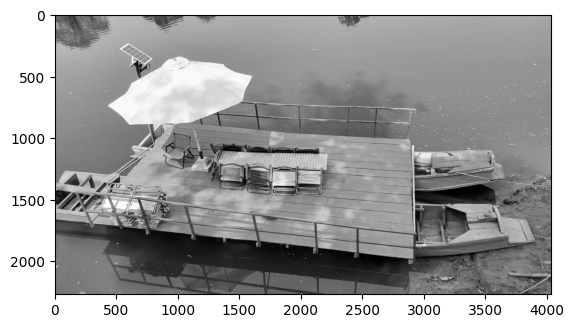

In [3]:
X = np.mean(A, -1); # Convert image to gray
img = plt.imshow(X, cmap='gray')
print("Shape of X", X.shape)
plt.imsave(f"output_gray/boat_original.jpg", X, cmap='gray')

### Computes the Singular Value Decomposition (SVD)

In [4]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

### Using rank instead of full matrix

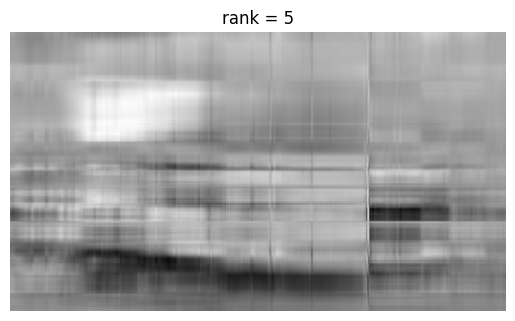

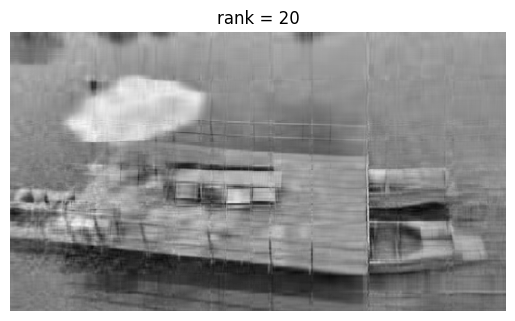

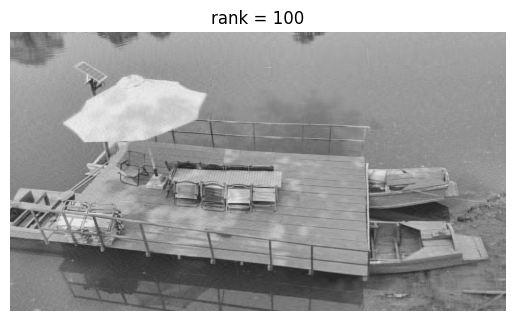

In [5]:
# 5
for r in (5, 20, 100):
    X_compressed = U[:, :r] @ S[:r, :r] @ VT[:r, :]
    img = plt.imshow(X_compressed, cmap='gray')
    plt.axis('off')
    plt.title("rank = " + str(r))
    plt.show()
    plt.imsave(f"output_gray/{r}_boat.jpg", X_compressed, cmap='gray')

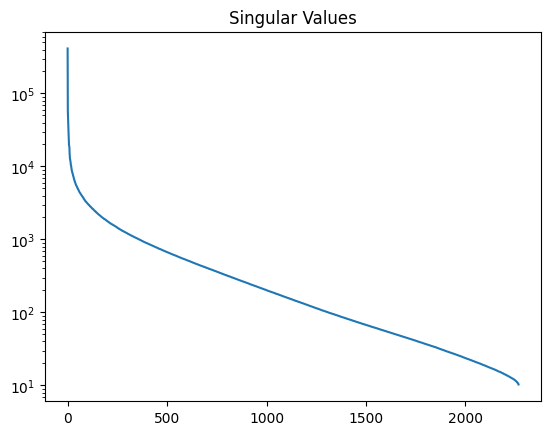

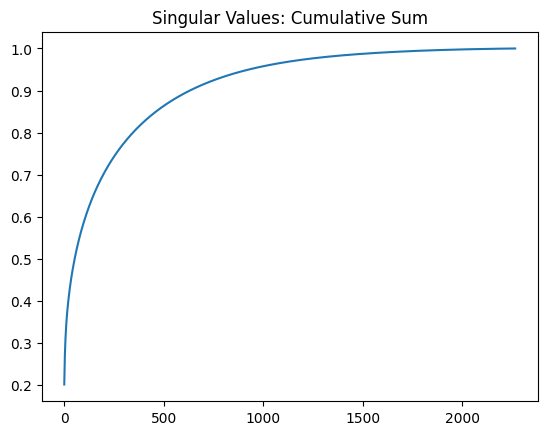

In [7]:

plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()
